# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '/users/mac/downloads/'

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [7]:
income_data=app_train[["TARGET","AMT_INCOME_TOTAL"]]
income_data["INCOME_TOTAL_log10"]=np.log10(income_data["AMT_INCOME_TOTAL"])
income_data.head()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TARGET,AMT_INCOME_TOTAL,INCOME_TOTAL_log10
0,1,202500.0,5.306425
1,0,270000.0,5.431364
2,0,67500.0,4.829304
3,0,135000.0,5.130334
4,0,121500.0,5.084576


In [8]:
bin_cut = 10
income_data["Income_Total_Binned"]=pd.cut(income_data["INCOME_TOTAL_log10"],bins=bin_cut)
income_data.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TARGET,AMT_INCOME_TOTAL,INCOME_TOTAL_log10,Income_Total_Binned
0,1,202500.0,5.306425,"(5.141, 5.507]"
1,0,270000.0,5.431364,"(5.141, 5.507]"
2,0,67500.0,4.829304,"(4.775, 5.141]"
3,0,135000.0,5.130334,"(4.775, 5.141]"
4,0,121500.0,5.084576,"(4.775, 5.141]"


In [9]:
income_data["Income_Total_Binned"].value_counts()

(5.141, 5.507]    141857
(4.775, 5.141]    140975
(5.507, 5.873]     15492
(4.405, 4.775]      8541
(5.873, 6.239]       582
(6.239, 6.605]        55
(6.605, 6.97]          6
(6.97, 7.336]          2
(7.702, 8.068]         1
(7.336, 7.702]         0
Name: Income_Total_Binned, dtype: int64

In [10]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

income_data["Income_Total_Binned"] = le.fit_transform(income_data["Income_Total_Binned"])            
income_data["Income_Total_Binned"].unique()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


array([2, 1, 3, 0, 4, 5, 8, 6, 7])

In [11]:
income_data["Income_Total_Binned"].value_counts()

2    141857
1    140975
3     15492
0      8541
4       582
5        55
6         6
7         2
8         1
Name: Income_Total_Binned, dtype: int64

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


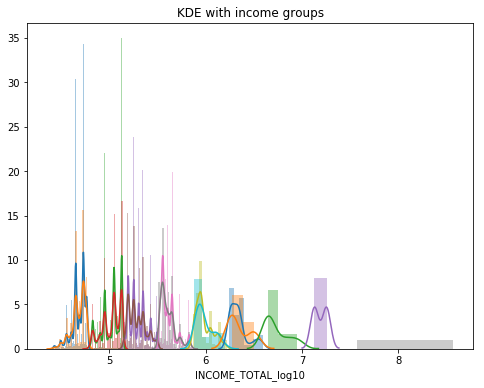

In [12]:
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
import seaborn as sns # 另一個繪圖-樣式套件
income_group_sorted = sorted(income_data["Income_Total_Binned"].unique())

plt.figure(figsize=(8,6))
for i in range(len(income_group_sorted )):
    sns.distplot(income_data.loc[(income_data["Income_Total_Binned"] == income_group_sorted [i]) & \
                              (income_data['TARGET'] == 0), 'INCOME_TOTAL_log10'], label = str(income_group_sorted [i]))
    
    sns.distplot(income_data.loc[(income_data["Income_Total_Binned"] == income_group_sorted [i]) & \
                              (income_data['TARGET'] == 1), 'INCOME_TOTAL_log10'], label = str(income_group_sorted [i]))
plt.title('KDE with income groups')
plt.show()

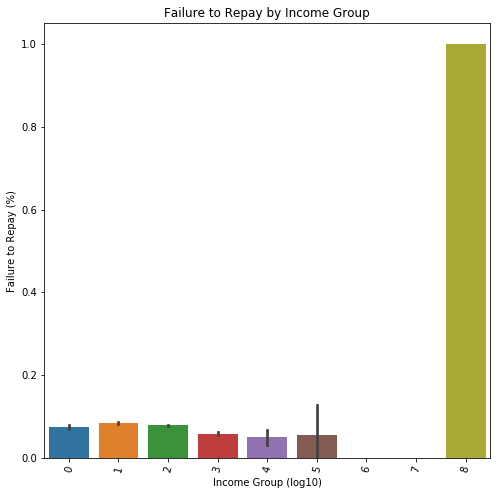

In [13]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""

px = income_data["Income_Total_Binned"]
py = app_train.TARGET
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Income Group (log10)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Income Group');

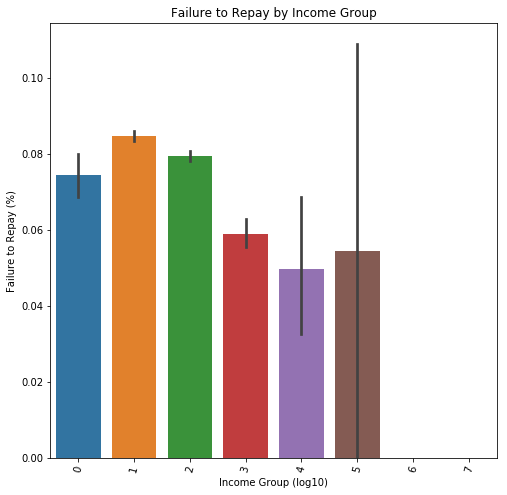

In [15]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
income_data.drop(income_data[income_data["Income_Total_Binned"]==8].index,inplace=True)
px = income_data["Income_Total_Binned"]
py = app_train.TARGET
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Income Group (log10)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Income Group');

In [28]:
income_data[income_data["TARGET"]==1]["Income_Total_Binned"].value_counts()
#income_data表中
#income_data["TARGET"]==1條件下
#["Income_Total_Binned"].value_counts()為何

1    11960
2    11279
3      916
0      637
4       29
5        3
Name: Income_Total_Binned, dtype: int64

In [29]:
income_data[income_data["TARGET"]==0]["Income_Total_Binned"].value_counts()

2    130578
1    129015
3     14576
0      7904
4       553
5        52
6         6
7         2
Name: Income_Total_Binned, dtype: int64